In [1]:
from sklearn.datasets import fetch_20newsgroups
import pickle
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import text
from nltk import pos_tag
import numpy as np
np.random.seed(42)
import random
random.seed(42)
import nltk
from numpy import linalg as LA
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC
from sklearn.decomposition import NMF


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#from sklearn import metrics
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB as GNB

from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


Question 1

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train')

print(list(newsgroups_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


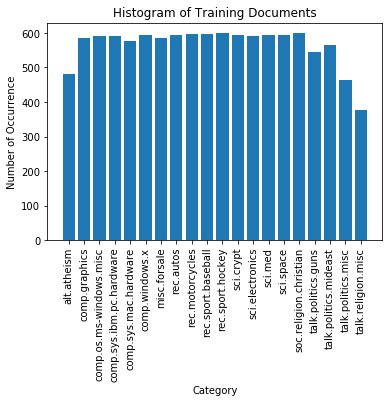

In [3]:
category, total = np.unique(newsgroups_train.target, return_counts=True)
plt.bar(category,total, tick_label=newsgroups_train.target_names)
plt.title('Histogram of Training Documents')
plt.xlabel('Category')
plt.ylabel('Number of Occurrence')
plt.xticks(rotation='vertical')
plt.show()

In [4]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']

train_dataset =fetch_20newsgroups(subset='train',categories=categories,shuffle= True,random_state=None)
test_dataset=fetch_20newsgroups(subset= 'test',categories=categories,shuffle= True,random_state=None)

target_names = train_dataset.target_names

In [6]:
category_item_count = [len(fetch_20newsgroups(categories = [name])['data']) for name in target_names]

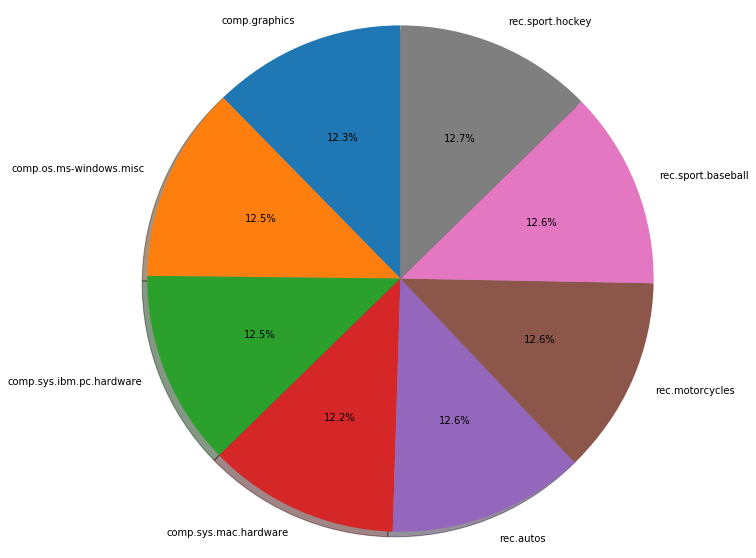

In [7]:
#plt.figure(figsize = (10,10))
fig, ax = plt.subplots(figsize = (10,10))
ax.pie(category_item_count, labels=target_names, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Text(0.5, 0, 'number of training documents')

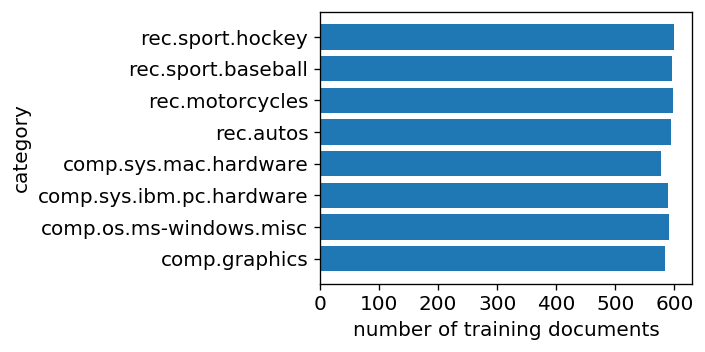

In [8]:
#plot histogram
plt.figure(figsize=(4,3),dpi=120)
plt.hist(train_dataset['target'],bins=np.arange(9)-0.5,orientation='horizontal',align='mid',rwidth=0.8)
plt.yticks(np.unique(train_dataset['target']),train_dataset['target_names'],fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('category',fontsize=12)
plt.xlabel('number of training documents',fontsize=12)

In [9]:
# Question 2

In [10]:
wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'
    
def lemmatize_sent_demo(text):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]
def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

In [11]:
analyzer = CountVectorizer().build_analyzer()
def remove_num(doc):
    return [word for word in lemmatize_sent(analyzer(doc)) if not word.isdigit()]

def remove_num_without_lemmatize(doc):
    return [word for word in (analyzer(doc)) if not word.isdigit()]

vectorizer = CountVectorizer(analyzer=remove_num,stop_words = 'english',min_df = 3)
vectorizer

CountVectorizer(analyzer=<function remove_num at 0x000001A1613404C8>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

Question 3.

In [12]:
tfidf_transformer = TfidfTransformer(smooth_idf=False)

X_train_count = vectorizer.fit_transform(train_dataset.data)
X_train_tfidf=tfidf_transformer.fit_transform(X_train_count)
X_test_tfidf = tfidf_transformer.transform(vectorizer.transform(test_dataset.data))
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(4732, 16600)
(3150, 16600)


In [13]:
svd = TruncatedSVD(n_components=50, random_state=0)
X_train_reduced_lsi = svd.fit_transform(X_train_tfidf)
X_train_recon_lsi = svd.inverse_transform(X_train_reduced_lsi)
residual_LSI = LA.norm(X_train_tfidf-X_train_recon_lsi)**2 # note LA norm is square root of what we want
print(residual_LSI)

3903.938465241572


In [14]:
X_test_reduced_lsi = svd.transform(X_test_tfidf)
print(X_test_reduced_lsi.shape)

(3150, 50)


In [15]:
NMF_model = NMF(n_components=50, init='random', random_state=0)
X_train_reduced_NMF = NMF_model.fit_transform(X_train_tfidf)
X_train_recon_NMF = NMF_model.inverse_transform(X_train_reduced_NMF)
residual_NMF = LA.norm(X_train_tfidf-X_train_recon_NMF)**2 # note LA norm is square root of what we want
print(residual_NMF) # slighty larger variance

3949.372470527448


In [16]:
X_test_reduced_NMF = NMF_model.transform(X_test_tfidf)
print(X_test_reduced_NMF.shape)

(3150, 50)


In [17]:
#train_dataset.
# 0-3 indicate comp, 4-7 indicate rec, we only classify these two categories
binary_training_label = []
binary_testing_label = []
for i in range(len(train_dataset.data)):
    if 'comp' in train_dataset.filenames[i]:
        binary_training_label.append(0)
    else:
        binary_training_label.append(1)
        
for i in range(len(test_dataset.data)):
    if 'comp' in test_dataset.filenames[i]:
        binary_testing_label.append(0)
    else:
        binary_testing_label.append(1)

In [18]:
def plot_roc(y_train, scores):
    fig, ax = plt.subplots()
    
    fpr, tpr, t = metrics.roc_curve(y_train, scores)
    
    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
        
def plot_confM(Estimator,X_test,Y_test,class_names):
    disp = plot_confusion_matrix(Estimator, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 display_labels=class_names,
                                 normalize=None)
    disp.ax_.set_title('Confusion Matrix')
    
# -1-> comp, 1->rec
def confusion_matrix_parameters(true_label,predicted_label):
    print('Accuracy:', metrics.accuracy_score(true_label, predicted_label))
    print('Precision:', metrics.precision_score(true_label, predicted_label))
    print('Recall:', metrics.recall_score(true_label, predicted_label))
    print('F1:', metrics.f1_score(true_label, predicted_label))
    

Question 4.

Accuracy: 0.9711111111111111
Precision: 0.9658172778123058
Recall: 0.9773584905660377
F1: 0.9715536105032823


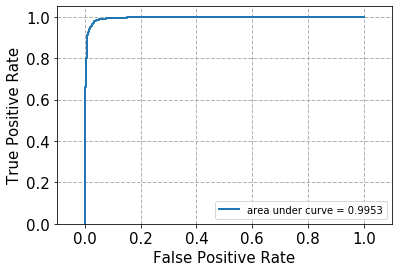

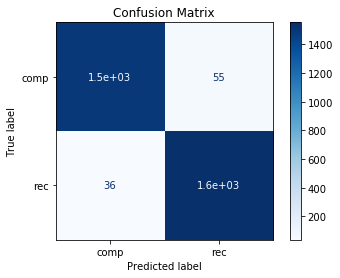

In [19]:
#LinearSVC().fit(X_train_tfidf, twenty_train.target).predict(X_new_tfidf)

#SVM hard margin classifier and LSI for dimensionality reduction
clf_SVM_hard_lsi = SVC(C= 1000,probability=True, kernel='linear') #hard margin
clf_SVM_hard_lsi.fit(X_train_reduced_lsi,binary_training_label)

SVM_prediction_hard_lsi = clf_SVM_hard_lsi.predict(X_test_reduced_lsi)
SVM_prediction_hard_score_lsi = clf_SVM_hard_lsi.decision_function(X_test_reduced_lsi)

plot_roc(binary_testing_label,SVM_prediction_hard_score_lsi) #roc

plot_confM(clf_SVM_hard_lsi,X_test_reduced_lsi,binary_testing_label,['comp','rec']) #confusion matrix

confusion_matrix_parameters(binary_testing_label,SVM_prediction_hard_lsi)


Accuracy: 0.5047619047619047
Precision: 0.5047619047619047
Recall: 1.0
F1: 0.6708860759493671


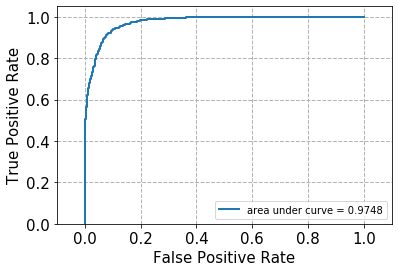

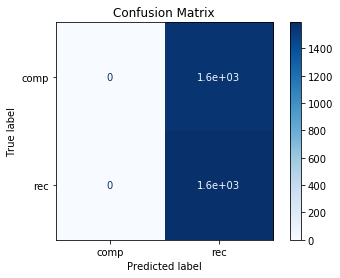

In [20]:
#SVM soft margin classifier and dimensionality reduction using LSI
clf_SVM_soft_lsi = SVC(C= 0.0001,probability=True, kernel='linear') #soft margin
clf_SVM_soft_lsi.fit(X_train_reduced_lsi,binary_training_label)

SVM_prediction_soft_lsi = clf_SVM_soft_lsi.predict(X_test_reduced_lsi)
SVM_prediction_soft_score_lsi = clf_SVM_soft_lsi.decision_function(X_test_reduced_lsi)

plot_roc(binary_testing_label,SVM_prediction_soft_score_lsi) #roc

plot_confM(clf_SVM_soft_lsi,X_test_reduced_lsi,binary_testing_label,['comp','rec']) #confusion matrix

confusion_matrix_parameters(binary_testing_label,SVM_prediction_soft_lsi)

In [21]:
def best_param(model,kargs,train_set,test_set,train_label,test_label):
    k_list=np.arange(-3,4,dtype='float')
    scores=[]
    for k in k_list:
        C=10**k
        clf=model(C=C,**kargs)
        # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        # https://scikit-learn.org/stable/modules/cross_validation.html
        scores.append(np.mean(cross_val_score(clf, train_set, train_label, 
                                              cv=KFold(5,shuffle=True,random_state=42), scoring='accuracy')))
    k_best=k_list[np.argmax(np.array(scores))]
    plt.plot(k_list,scores,label='best k is {:.4f}, C={:.4f}'.format(k_best, 10**k_best))
    plt.xlabel('k')
    plt.ylabel('5-fold mean accuracy')
    plt.legend()
    #plt.title(str(model))
    
    clf=model(C=10**k_best,**kargs)
    clf.fit(train_set,train_label)
    
    clf_prediction = clf.predict(test_set)
    clf_prediction_score = clf.decision_function(test_set)

    plot_roc(test_label,clf_prediction_score) #roc
    plot_confM(clf,test_set,test_label,['comp','rec']) #confusion matrix
    confusion_matrix_parameters(test_label,clf_prediction)


Accuracy: 0.9701587301587301
Precision: 0.9634448574969021
Recall: 0.9779874213836478
F1: 0.9706616729088638


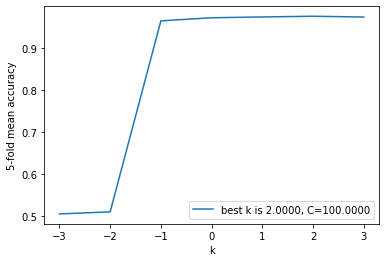

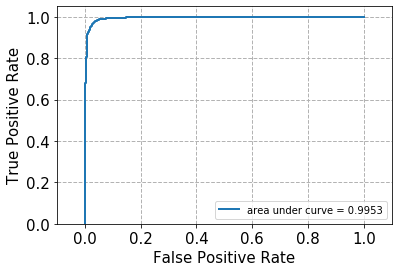

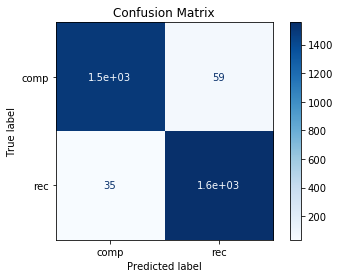

In [22]:
# Dimensionality reduction using LSI
model=SVC # Linear SVC CV
kargs={'probability': True,'kernel':'linear'}
best_param(model,kargs,X_train_reduced_lsi,X_test_reduced_lsi,binary_training_label,binary_testing_label)

In [23]:
#LSI
model = SVC(probability=True, kernel='linear')
parameters = {'C':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
model_grid = GridSearchCV(model,parameters,cv=5)
model_grid.fit(X_train_reduced_lsi,binary_training_label)
pd.DataFrame(model_grid.cv_results_)[['param_C','mean_test_score']]

,param_C,mean_test_score
0,0.001,0.504861
1,0.01,0.505706
2,0.1,0.964496
3,1,0.971258
4,10,0.974217
5,100,0.973372
6,1000,0.975062


Question 5

Accuracy: 0.9695238095238096
Precision: 0.9628252788104089
Recall: 0.9773584905660377
F1: 0.9700374531835205


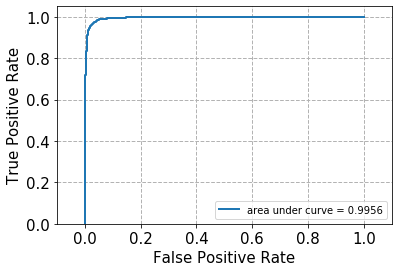

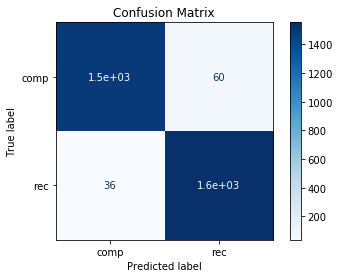

In [24]:
# Logistic regression without regulization and LSI : C is made extremely large
from sklearn.linear_model import LogisticRegression as LR
lr_no_lsi=LR(penalty='l2',C=10**15,max_iter= 10000)
lr_no_lsi.fit(X_train_reduced_lsi,binary_training_label)
scores_lr_no_lsi=lr_no_lsi.decision_function(X_test_reduced_lsi)
pred_lr_no_lsi=lr_no_lsi.predict(X_test_reduced_lsi)

plot_roc(binary_testing_label,scores_lr_no_lsi) #roc

plot_confM(lr_no_lsi,X_test_reduced_lsi,binary_testing_label,['comp','rec']) #confusion matrix

confusion_matrix_parameters(binary_testing_label,pred_lr_no_lsi)

Accuracy: 0.9685714285714285
Precision: 0.961609907120743
Recall: 0.9767295597484277
F1: 0.9691107644305772


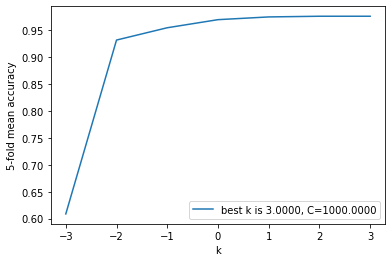

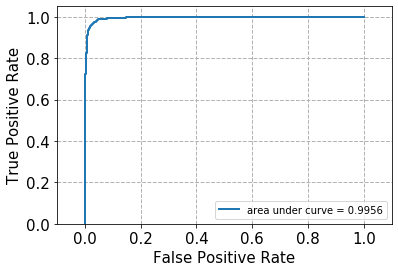

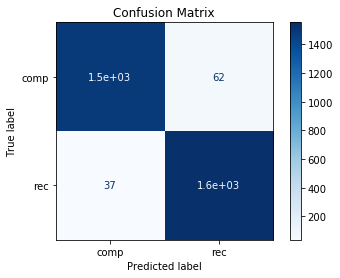

In [27]:
model=LR  #L2 regularization
kargs={'penalty':'l2','max_iter': 10000}
best_param(model,kargs,X_train_reduced_lsi,X_test_reduced_lsi,binary_training_label,binary_testing_label)

Accuracy: 0.9685714285714285
Precision: 0.961038961038961
Recall: 0.9773584905660377
F1: 0.9691300280636108


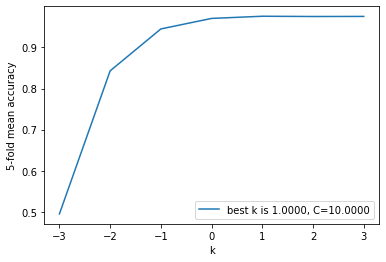

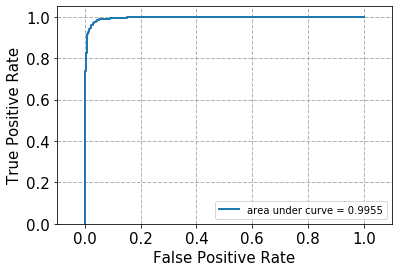

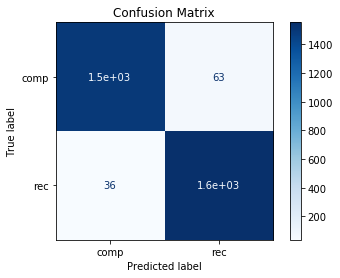

In [28]:
model=LR  # "L1" regulization
kargs={'penalty':'l1','solver':'liblinear'}
best_param(model,kargs,X_train_reduced_lsi,X_test_reduced_lsi,binary_training_label,binary_testing_label)

Question 6

Accuracy: 0.9073015873015873
Precision: 0.8585635359116022
Recall: 0.9773584905660377
F1: 0.9141176470588235


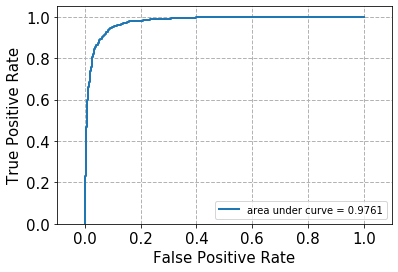

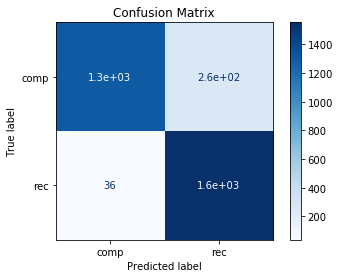

In [29]:
# Naive Bayes part
gnb_lsi=GNB()

gnb_lsi.fit(X_train_reduced_lsi,binary_training_label)
scores_gnb_lsi=gnb_lsi.predict_log_proba(X_test_reduced_lsi)[:,1]
pred_gnb_lsi=gnb_lsi.predict(X_test_reduced_lsi)

plot_roc(binary_testing_label,scores_gnb_lsi) #roc

plot_confM(gnb_lsi,X_test_reduced_lsi,binary_testing_label,['comp','rec']) #confusion matrix

confusion_matrix_parameters(binary_testing_label,pred_gnb_lsi)